In [ ]:
import pandas as pd
url = "C:/Users/franc/Downloads/covidvaccine_limpio.csv"
df = pd.read_csv(url)
df.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_19652\3152016471.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias
0,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,False,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,2762
1,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,2013-05-07 03:57:00,918.0,2561.0,31837.0,False,2020-08-18 12:34:00,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False,2660
2,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2015-02-07 07:24:00,2321.0,3236.0,264351.0,False,2020-08-18 12:30:00,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,2019
3,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",2009-01-17 21:10:00,19091.0,20986.0,128119.0,False,2020-08-18 12:15:00,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,4230
4,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",2017-03-16 20:22:00,282.0,96.0,788.0,False,2020-08-18 11:57:00,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,1250


In [ ]:
df["texto_nuevo"] = (
    df["text"]
    .str.lower()# Convertir a minúsculas
    .str.replace("http\\S+", "", regex=True)          # Eliminar URLs
    .str.replace("@\\w+", "", regex=True)             # Eliminar menciones
    .str.replace("#", "")                             # Eliminar solo el símbolo #
    .str.replace("\n", " ", regex=True)               # Reemplazar saltos de línea por espacios
    .str.replace(" +", " ", regex=True)               # Quitar espacios múltiples
    .str.strip()
    .str.replace("\n"," ", regex  = True)           ##reemplazamos los \n que parecian saltos de línea                                   # Limpiar espacios al inicio y final
)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250414 entries, 0 to 250413
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         250413 non-null  object 
 1   user_location     250414 non-null  object 
 2   user_description  245676 non-null  object 
 3   user_created      250414 non-null  object 
 4   user_followers    250414 non-null  float64
 5   user_friends      250414 non-null  float64
 6   user_favourites   250414 non-null  float64
 7   user_verified     250414 non-null  bool   
 8   date              250414 non-null  object 
 9   text              250414 non-null  object 
 10  hashtags          210031 non-null  object 
 11  source            250394 non-null  object 
 12  is_retweet        250411 non-null  object 
 13  diff_dias         250414 non-null  int64  
 14  texto_nuevo       250414 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 27.0+ MB


In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo
0,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,False,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,2762,this is what passes for leadership in our coun...
1,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,2013-05-07 03:57:00,918.0,2561.0,31837.0,False,2020-08-18 12:34:00,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False,2660,…
2,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2015-02-07 07:24:00,2321.0,3236.0,264351.0,False,2020-08-18 12:30:00,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,2019,"well, let’s qualify that: would anyone of any ..."
3,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",2009-01-17 21:10:00,19091.0,20986.0,128119.0,False,2020-08-18 12:15:00,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,4230,"most countries, without the ability to make va..."
4,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",2017-03-16 20:22:00,282.0,96.0,788.0,False,2020-08-18 11:57:00,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,1250,dna zooms up charts in 1st week; hear vaccines...


In [ ]:
## cargamos la librerías neccesarias para crear una columna con los sentimiento ya sea positivo, negativo o neutro
import os
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import torch.nn.functional as F

In [ ]:
#comprobamos el uso del servicio de cuda para usar el gpu
# Para obtener errores CUDA más precisos (opcional)
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f' Dispositivo usado: {device}')


 Dispositivo usado: cuda


In [ ]:
###ahora cargamos el modelo que se usará en este analisis

model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
#etiquetamos  que valores queremos positivo negativo y neutros
label_map = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#aplicamos la funcion para tokenizar las palabras y  limpiar el texto para que no tenga espacios
#luego se parte los textos en batches

def analizar_sentimiento_y_score(texts, model, tokenizer, device, batch_size=16):
    etiquetas = []
    scores = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Analizando..."):
        batch_texts = texts[i:i+batch_size]
        batch_texts = [str(t) if t else "" for t in batch_texts]

        try:
            inputs = tokenizer(batch_texts, return_tensors="pt", padding=True,
                               truncation=True, max_length=512).to(device)

            with torch.no_grad():
                with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
                    outputs = model(**inputs)

            logits = outputs.logits.detach().cpu()
            probs = F.softmax(logits, dim=1).numpy()  # ✅ CORRECTO

            preds = np.argmax(probs, axis=1)  # ✅ basados en softmax
            etiquetas_batch = [label_map[p] for p in preds]

            score_batch = (probs * np.array([-1, 0, 1])).sum(axis=1)

            etiquetas.extend(etiquetas_batch)
            scores.extend(score_batch)

            del inputs, outputs, logits
            torch.cuda.empty_cache()

        except Exception as e:
            print(f"❌ Error: {e}")
            raise e

    return etiquetas, scores

# aplicamos el dataframe
df['texto_nuevo'] = df['texto_nuevo'].astype(str).fillna("").str.strip()
valid_idx = df['texto_nuevo'].str.len() > 0
textos_validos = df.loc[valid_idx, 'texto_nuevo'].tolist()

etiquetas, scores = analizar_sentimiento_y_score(
    textos_validos, model, tokenizer, device, batch_size=16
)

df['sentimiento'] = 'Indeterminado'
df['sentimiento_score'] = np.nan
df.loc[valid_idx, 'sentimiento'] = etiquetas
df.loc[valid_idx, 'sentimiento_score'] = scores



Analizando...: 100%|██████████| 15651/15651 [43:11<00:00,  6.04it/s] 


In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo,sentimiento,sentimiento_score
0,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,False,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,2762,this is what passes for leadership in our coun...,Negativo,-0.853523
1,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,2013-05-07 03:57:00,918.0,2561.0,31837.0,False,2020-08-18 12:34:00,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False,2660,…,Neutral,0.179016
2,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2015-02-07 07:24:00,2321.0,3236.0,264351.0,False,2020-08-18 12:30:00,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,2019,"well, let’s qualify that: would anyone of any ...",Negativo,-0.557373
3,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",2009-01-17 21:10:00,19091.0,20986.0,128119.0,False,2020-08-18 12:15:00,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,4230,"most countries, without the ability to make va...",Negativo,-0.594971
4,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",2017-03-16 20:22:00,282.0,96.0,788.0,False,2020-08-18 11:57:00,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,1250,dna zooms up charts in 1st week; hear vaccines...,Neutral,0.177383


In [ ]:
#filtro para quitar los datos indeterminados =
filtro = (df["sentimiento"] == "Neutral") | (df["sentimiento"] == "Negativo") | (df["sentimiento"] =="Positivo")
df = df.loc[filtro]
df.to_csv("tweets_con_sentimiento_y_score_nuevo.csv", index=False)

In [ ]:
##AHORA PONDREMOS LOS PAISES Y SU CÓDIGO DE PAIS CON LAS SIGUIENTES CARPETAS
import pandas as pd
import geonamescache
import pycountry
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed # Usamos ThreadPool para tareas de red
import os
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:

#geolocalizamos
class OfflineGeocoder:
    def __init__(self):
        print("Inicializando OfflineGeocoder: Cargando y pre-procesando datos geoespaciales...")
        gc = geonamescache.GeonamesCache()

        self.countries = {c['name'].lower(): c['iso3'] for c in gc.get_countries().values()}

        self.cities = {}
        all_cities = sorted(gc.get_cities().values(), key=lambda c: c['population'], reverse=True)
        for city_data in all_cities:
            name_lower = city_data['name'].lower()
            if name_lower not in self.cities:
                try:
                    self.cities[name_lower] = pycountry.countries.get(alpha_2=city_data['countrycode']).alpha_3
                except (AttributeError, LookupError):
                    continue

        self.admin1s = {}
        for subdivision in pycountry.subdivisions:
            try:
                country_iso3 = pycountry.countries.get(alpha_2=subdivision.country_code).alpha_3
                self.admin1s[subdivision.name.lower()] = country_iso3
                self.admin1s[subdivision.code.split('-')[-1].lower()] = country_iso3
            except (AttributeError, LookupError):
                continue

        self.all_places_sorted = sorted(
            list(set(self.countries.keys()) | set(self.admin1s.keys()) | set(self.cities.keys())),
            key=len, reverse=True
        )

        print(f"✅ OfflineGeocoder listo con {len(self.countries)} países, {len(self.admin1s)} subdivisiones y {len(self.cities)} ciudades.")

    def geocode(self, location_text):
        if not isinstance(location_text, str) or not location_text.strip():
            return (None, None)

        loc_clean = location_text.lower().strip()

        if loc_clean in self.countries:
            iso3 = self.countries[loc_clean]
            country = pycountry.countries.get(alpha_3=iso3)
            if country:
                return country.name, iso3

        if loc_clean in self.admin1s:
            iso3 = self.admin1s[loc_clean]
            country = pycountry.countries.get(alpha_3=iso3)
            if country:
                return country.name, iso3

        if loc_clean in self.cities:
            iso3 = self.cities[loc_clean]
            country = pycountry.countries.get(alpha_3=iso3)
            if country:
                return country.name, iso3


        if ',' in loc_clean:
            parts = [p.strip() for p in loc_clean.split(',')]
            if len(parts) == 2:
                part1, part2 = parts
                country_iso3_p2 = self.countries.get(part2) or self.admin1s.get(part2)
                if country_iso3_p2 and part1 in self.cities and self.cities.get(part1) == country_iso3_p2:
                    country = pycountry.countries.get(alpha_3=country_iso3_p2)
                    if country:
                        return country.name, country_iso3_p2


        for place in self.all_places_sorted:
            if place in loc_clean:
                if place in self.countries:
                    iso3 = self.countries[place]
                elif place in self.admin1s:
                    iso3 = self.admin1s[place]
                else:
                    iso3 = self.cities.get(place)

                if iso3:
                    country = pycountry.countries.get(alpha_3=iso3)
                    if country:
                        return country.name, iso3

        return (None, None)




In [ ]:



geocoder = OfflineGeocoder()

#limpiamos las ubicaciones que sean nulas
all_locations = df['user_location'].dropna().unique()
print(f" Total de ubicaciones únicas: {len(all_locations)}")

# busquedas
location_map = {}
for loc in tqdm(all_locations, desc="🌍 Geocodificando..."):
    location_map[loc] = geocoder.geocode(loc)

# Aplicar resultados al DataFrame
geo_results = df['user_location'].map(location_map)
df[['pais', 'codigo_pais']] = pd.DataFrame(geo_results.tolist(), index=df.index)

# Verificar resultados
print(f" {df['pais'].notna().sum()} pais")
display(df[['user_location', 'pais', 'codigo_pais']].dropna().head(10))

Inicializando OfflineGeocoder: Cargando y pre-procesando datos geoespaciales...
✅ OfflineGeocoder listo con 252 países, 6762 subdivisiones y 24972 ciudades.
 Total de ubicaciones únicas: 35300


🌍 Geocodificando...:   0%|          | 0/35300 [00:00<?, ?it/s]

 248467 pais


,user_location,pais,codigo_pais
0,"Adelaide, South Australia",Australia,AUS
1,"Hyderabad, India",Pakistan,PAK
2,The Great Pacific Northwest,Cameroon,CMR
3,"Washington, DC 20009",United States,USA
4,"Nashville, TN",United States,USA
5,"Berlin, Germany",Germany,DEU
6,Mumbai,India,IND
7,"Hyderabad, India",Pakistan,PAK
8,Chennai,India,IND
9,Sheffield & Leeds,United Kingdom,GBR


In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo,sentimiento,sentimiento_score,pais,codigo_pais
0,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,False,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,2762,this is what passes for leadership in our coun...,Negativo,-0.853523,Australia,AUS
1,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,2013-05-07 03:57:00,918.0,2561.0,31837.0,False,2020-08-18 12:34:00,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False,2660,…,Neutral,0.179016,Pakistan,PAK
2,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2015-02-07 07:24:00,2321.0,3236.0,264351.0,False,2020-08-18 12:30:00,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,2019,"well, let’s qualify that: would anyone of any ...",Negativo,-0.557373,Cameroon,CMR
3,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",2009-01-17 21:10:00,19091.0,20986.0,128119.0,False,2020-08-18 12:15:00,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,4230,"most countries, without the ability to make va...",Negativo,-0.594971,United States,USA
4,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",2017-03-16 20:22:00,282.0,96.0,788.0,False,2020-08-18 11:57:00,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,1250,dna zooms up charts in 1st week; hear vaccines...,Neutral,0.177383,United States,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250414 entries, 0 to 250413
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_name          250413 non-null  object 
 1   user_location      250414 non-null  object 
 2   user_description   245676 non-null  object 
 3   user_created       250414 non-null  object 
 4   user_followers     250414 non-null  float64
 5   user_friends       250414 non-null  float64
 6   user_favourites    250414 non-null  float64
 7   user_verified      250414 non-null  bool   
 8   date               250414 non-null  object 
 9   text               250414 non-null  object 
 10  hashtags           210031 non-null  object 
 11  source             250394 non-null  object 
 12  is_retweet         250411 non-null  object 
 13  diff_dias          250414 non-null  int64  
 14  texto_nuevo        250414 non-null  object 
 15  sentimiento        250414 non-null  object 
 16  sentimi

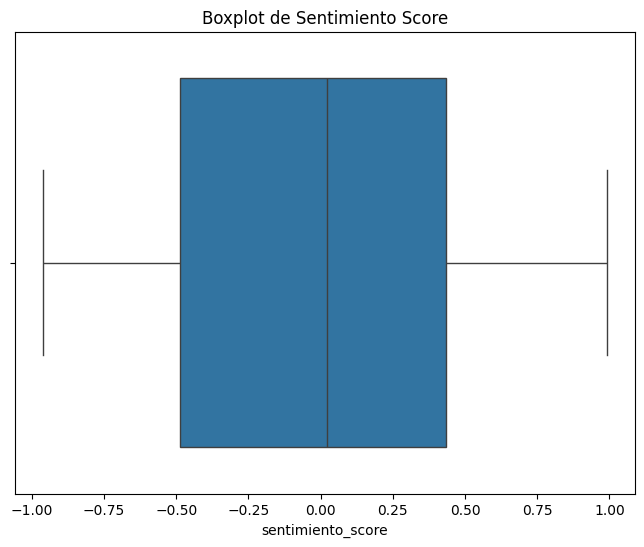

In [ ]:
#ahora analizamos mediante gráficos de boxplot para ver los valores atípicos de los sentimientos_score
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de boxplot para 'sentimiento_score'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentimiento_score')
plt.title('Boxplot de Sentimiento Score')
plt.show()


In [ ]:
#solo seleccionamos los paises que tengan más de 1000 registros para que sea significativo
#esto es para filtrar a los paises que tienen más de mil registros


# 2. Obtener el conteo de valores únicos
conteo_ubicaciones = df['pais'].value_counts()

# 3. Filtrar los valores con frecuencia > 100 y guardarlos en un array
ubicaciones_frecuentes = conteo_ubicaciones[conteo_ubicaciones > 1000].index.to_numpy()

# 4. Filtrar el DataFrame para conservar solo esas ubicaciones frecuentes
df_top_paises = df[df['pais'].isin(ubicaciones_frecuentes)]

# (Opcional) Verifica el resultado
print(f"Ubicaciones con más de 1000 apariciones: {len(ubicaciones_frecuentes)}")
display(df_top_paises)
df_top_paises['pais'].unique()
df = df_top_paises



Ubicaciones con más de 1000 apariciones: 24


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo,sentimiento,sentimiento_score,pais,codigo_pais
0,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,2013-01-24 14:53:00,83.0,497.0,10737.0,False,2020-08-18 12:45:00,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,2762,this is what passes for leadership in our coun...,Negativo,-0.853523,Australia,AUS
1,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,2013-05-07 03:57:00,918.0,2561.0,31837.0,False,2020-08-18 12:34:00,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False,2660,…,Neutral,0.179016,Pakistan,PAK
2,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2015-02-07 07:24:00,2321.0,3236.0,264351.0,False,2020-08-18 12:30:00,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False,2019,"well, let’s qualify that: would anyone of any ...",Negativo,-0.557373,Cameroon,CMR
3,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",2009-01-17 21:10:00,19091.0,20986.0,128119.0,False,2020-08-18 12:15:00,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False,4230,"most countries, without the ability to make va...",Negativo,-0.594971,United States,USA
4,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",2017-03-16 20:22:00,282.0,96.0,788.0,False,2020-08-18 11:57:00,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,1250,dna zooms up charts in 1st week; hear vaccines...,Neutral,0.177383,United States,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250408,A Chronic Voice,Singapore,Articulating #chronicillness from various pers...,2015-11-09 13:36:16,17331.0,13737.0,284932.0,False,2022-09-06 05:30:08,"""Structural studies..showed that #SP177 works ...","['SP177', 'antibodies', 'vaccines', 'COVID19',...",Buffer,False,2492,"""structural studies..showed that sp177 works d...",Neutral,0.017700,Singapore,SGP
250409,MiggyMack 🙂,Johannesburg,Mig-El is my Kryptonian name. \n\nhttps://t.co...,2010-11-27 17:22:10,1083.0,1481.0,122176.0,False,2022-09-06 05:28:32,Whoopsies &lt;counts billions he made from gov...,"['covidvaccine', 'Pfizer']",Twitter for Android,False,4300,whoopsies &lt;counts billions he made from gov...,Negativo,-0.758179,South Africa,ZAF
250410,CSIR-NEERI: Wastewater Technology Division,Nagpur,To provide solutions and interventions for Ind...,2020-07-07 06:03:00,379.0,69.0,387.0,False,2022-09-06 04:45:37,#GIS Representation of #Covid_19 scenario for ...,"['GIS', 'Covid_19', 'India', 'Vaccination', 'C...",Twitter Web App,False,790,gis representation of covid_19 scenario for in...,Neutral,-0.042542,India,IND
250411,Marc Perreault 🇨🇦,Lacombe,"Husband, dad, follower of Jesus, friend and ho...",2009-04-08 14:13:14,472.0,649.0,28585.0,False,2022-09-06 04:25:30,This is incredible. Pfizer boss backtracking o...,"['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']",Twitter for Android,False,4898,this is incredible. pfizer boss backtracking o...,Negativo,-0.534607,Philippines,PHL


In [ ]:
df["pais"].unique()

array(['Australia', 'Pakistan', 'Cameroon', 'United States', 'India',
       'United Kingdom', 'Afghanistan', 'Philippines', 'Canada', 'Mexico',
       'Russian Federation', 'Ireland', 'Uruguay', 'Yemen', 'New Zealand',
       'Venezuela, Bolivarian Republic of', 'South Africa', 'Nigeria',
       'Morocco', 'Jamaica', 'Peru', 'France', 'Singapore', 'Zimbabwe'],
      dtype=object)

In [ ]:
#eliminamos datos outlier por pais
data_sin_outliers = pd.DataFrame()

for pais, grupo in df.groupby("pais"):
    Q1 = grupo["sentimiento_score"].quantile(0.25)
    Q3 = grupo["sentimiento_score"].quantile(0.75)
    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    filtro  = (grupo["sentimiento_score"]>= limite_inf) & (grupo["sentimiento_score"]<=  limite_sup)
    data_filtrada  = grupo.loc[filtro]
    data_sin_outliers = pd.concat([data_filtrada, data_sin_outliers], axis=0)
df["pais"].unique()

array(['Australia', 'Pakistan', 'Cameroon', 'United States', 'India',
       'United Kingdom', 'Afghanistan', 'Philippines', 'Canada', 'Mexico',
       'Russian Federation', 'Ireland', 'Uruguay', 'Yemen', 'New Zealand',
       'Venezuela, Bolivarian Republic of', 'South Africa', 'Nigeria',
       'Morocco', 'Jamaica', 'Peru', 'France', 'Singapore', 'Zimbabwe'],
      dtype=object)

In [ ]:
#ponemos continente a cada pais
pais_a_continente = {
    'Zimbabwe': 'África',
    'Venezuela, Bolivarian Republic of': 'América del Sur',
    'Uruguay': 'América del Sur',
    'United States': 'América del Norte',
    'United Kingdom': 'Europa',
    'South Africa': 'África',
    'Singapore': 'Asia',
    'Saint Helena, Ascension and Tristan da Cunha': 'África',
    'Russian Federation': 'Europa',
    'Philippines': 'Asia',
    'Peru': 'América del Sur',
    'Pakistan': 'Asia',
    'Nigeria': 'África',
    'New Zealand': 'Oceanía',
    'Morocco': 'África',
    'Mexico': 'América del Norte',
    'Jamaica': 'América del Norte',
    'Ireland': 'Europa',
    'India': 'Asia',
    'Germany': 'Europa',
    'France': 'Europa',
    'El Salvador': 'América del Norte',
    'Canada': 'América del Norte',
    'Cameroon': 'África',
    'Burundi': 'África',
    'Burkina Faso': 'África',
    'Australia': 'Oceanía',
    'Afghanistan': 'Asia'
}
data_sin_outliers['continente'] = data_sin_outliers['pais'].map(pais_a_continente)
df = data_sin_outliers

df.to_csv("datos_con_analisis_sentimiento.csv", index=False)

In [ ]:
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo,sentimiento,sentimiento_score,pais,codigo_pais,continente
805,mumbaikar 2.0,Home,"*here for the updates, memes and puns *",2012-06-11 14:29:00,188.0,146.0,2824.0,False,2020-08-11 17:39:00,Russia announces #CovidVaccine \nOther countri...,['CovidVaccine'],Twitter for Android,False,2983,russia announces covidvaccine other countries:,Neutral,-0.031097,Zimbabwe,ZWE,África
2570,Dobs™,back of your mind,He suffers from Ben Button disease. He reached...,2009-11-06 12:37:00,594.0,331.0,1234.0,False,2020-09-09 11:03:00,#DobsRidiculosity Trump will probably whip up ...,"['DobsRidiculosity', 'Astrazeneca', 'vaccine',...",Twitter for Android,False,3959,dobsridiculosity trump will probably whip up a...,Negativo,-0.550781,Zimbabwe,ZWE,África
2739,TimWould.,Home,"I thought they said beat out to help out, and ...",2013-02-19 08:49:00,696.0,579.0,16934.0,False,2020-09-08 19:04:00,CEO's issue safety pledge 😂\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False,2758,ceo's issue safety pledge 😂 covidvaccine,Neutral,0.141113,Zimbabwe,ZWE,África
3105,Ragnorakishere,Merseyside,QARANC Veteran. Everton FC Thoughts are my own...,2017-02-01 12:24:00,1551.0,1794.0,15150.0,False,2020-09-04 07:34:00,https://t.co/QeAOuJd27L Consider the pitfalls ...,['UBI'],Twitter Web App,False,1310,consider the pitfalls of ubi it irrevocably su...,Negativo,-0.513809,Zimbabwe,ZWE,África
3486,We All Need A Helping Hand,MA.,"Livinlaughin&learnin to love.Found objects,pun...",2016-06-27 23:43:00,2986.0,4833.0,83222.0,False,2020-09-16 02:23:00,the woman asked trump about #immigrationreform...,"['immigrationreform', 'CovidVaccine']",Twitter for Android,False,1541,the woman asked trump about immigrationreform ...,Negativo,-0.757454,Zimbabwe,ZWE,África


In [1]:
import pandas as pd
import re

df = pd.read_csv("/content/datos_con_analisis_sentimiento.csv")

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002700-\U000027BF"
        "\U0001F900-\U0001F9FF"
        "\U00002600-\U000026FF"
        "\U0001FA70-\U0001FAFF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['texto_nuevo'] = df['texto_nuevo'].apply(remove_emojis)

df.head()

/tmp/ipython-input-1-4143355432.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/datos_con_analisis_sentimiento.csv")


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo,sentimiento,sentimiento_score,pais,codigo_pais,continente
0,mumbaikar 2.0,Home,"*here for the updates, memes and puns *",2012-06-11 14:29:00,188.0,146.0,2824.0,False,2020-08-11 17:39:00,Russia announces #CovidVaccine \nOther countri...,['CovidVaccine'],Twitter for Android,False,2983,russia announces covidvaccine other countries:,Neutral,-0.031097,Zimbabwe,ZWE,África
1,Dobs™,back of your mind,He suffers from Ben Button disease. He reached...,2009-11-06 12:37:00,594.0,331.0,1234.0,False,2020-09-09 11:03:00,#DobsRidiculosity Trump will probably whip up ...,"['DobsRidiculosity', 'Astrazeneca', 'vaccine',...",Twitter for Android,False,3959,dobsridiculosity trump will probably whip up a...,Negativo,-0.550781,Zimbabwe,ZWE,África
2,TimWould.,Home,"I thought they said beat out to help out, and ...",2013-02-19 08:49:00,696.0,579.0,16934.0,False,2020-09-08 19:04:00,CEO's issue safety pledge 😂\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False,2758,ceo's issue safety pledge covidvaccine,Neutral,0.141113,Zimbabwe,ZWE,África
3,Ragnorakishere,Merseyside,QARANC Veteran. Everton FC Thoughts are my own...,2017-02-01 12:24:00,1551.0,1794.0,15150.0,False,2020-09-04 07:34:00,https://t.co/QeAOuJd27L Consider the pitfalls ...,['UBI'],Twitter Web App,False,1310,consider the pitfalls of ubi it irrevocably su...,Negativo,-0.513809,Zimbabwe,ZWE,África
4,We All Need A Helping Hand,MA.,"Livinlaughin&learnin to love.Found objects,pun...",2016-06-27 23:43:00,2986.0,4833.0,83222.0,False,2020-09-16 02:23:00,the woman asked trump about #immigrationreform...,"['immigrationreform', 'CovidVaccine']",Twitter for Android,False,1541,the woman asked trump about immigrationreform ...,Negativo,-0.757454,Zimbabwe,ZWE,África


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220454 entries, 0 to 220453
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_name          220453 non-null  object 
 1   user_location      220454 non-null  object 
 2   user_description   216361 non-null  object 
 3   user_created       220454 non-null  object 
 4   user_followers     220454 non-null  float64
 5   user_friends       220454 non-null  float64
 6   user_favourites    220454 non-null  float64
 7   user_verified      220454 non-null  bool   
 8   date               220454 non-null  object 
 9   text               220454 non-null  object 
 10  hashtags           184285 non-null  object 
 11  source             220448 non-null  object 
 12  is_retweet         220452 non-null  object 
 13  diff_dias          220454 non-null  int64  
 14  texto_nuevo        220454 non-null  object 
 15  sentimiento        220454 non-null  object 
 16  se

In [4]:
from google.colab import files

df.to_csv("datos_con_analisis_sentimiento.csv", index=False)
files.download("datos_con_analisis_sentimiento.csv")

print("Se ha guardado y descargado correctamente el dataset!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se ha guardado y descargado correctamente el dataset!
